## WS25: Seminar: Business Analytics (Master) - BWL 12
### Topic: Supply Chain Resilience under Disruptions — An Agent-Based Simulation with Mesa


=== Scenario: capacity_only ===
  Sourcing: single
Disruption at step 10 | Scenario: capacity_only | Victim: <Firm 5 | Tier: plant | Inv: 64 | Backlog: 0 | On order: 0>
Disruption at step 10 | Scenario: capacity_only | Victim: <Firm 2 | Tier: supplier | Inv: 120 | Backlog: 0 | On order: 0>
Disruption at step 10 | Scenario: capacity_only | Victim: <Firm 3 | Tier: plant | Inv: 95 | Backlog: 0 | On order: 0>
  Sourcing: dual
Disruption at step 10 | Scenario: capacity_only | Victim: <Firm 5 | Tier: plant | Inv: 95 | Backlog: 0 | On order: 0>
Disruption at step 10 | Scenario: capacity_only | Victim: <Firm 2 | Tier: supplier | Inv: 120 | Backlog: 0 | On order: 0>
Disruption at step 10 | Scenario: capacity_only | Victim: <Firm 3 | Tier: plant | Inv: 79 | Backlog: 0 | On order: 0>

=== Scenario: lead_time_surge ===
  Sourcing: single
Disruption at step 10 | Scenario: lead_time_surge | Victim: <Firm 5 | Tier: plant | Inv: 95 | Backlog: 0 | On order: 0>
Disruption at step 10 | Scenario: lead_ti

/tmp/ipykernel_32111/987351489.py:113: RuntimeWarning: Mean of empty slice
  ttr_means.append(np.nanmean(ttrs))
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_32111/987351489.py:113: RuntimeWarning: Mean of empty slice
  ttr_means.append(np.nanmean(ttrs))
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_32111/987351489.py:113: RuntimeWarning: Mean of empty slice
  ttr_means.append(np.nanmean(ttrs))
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


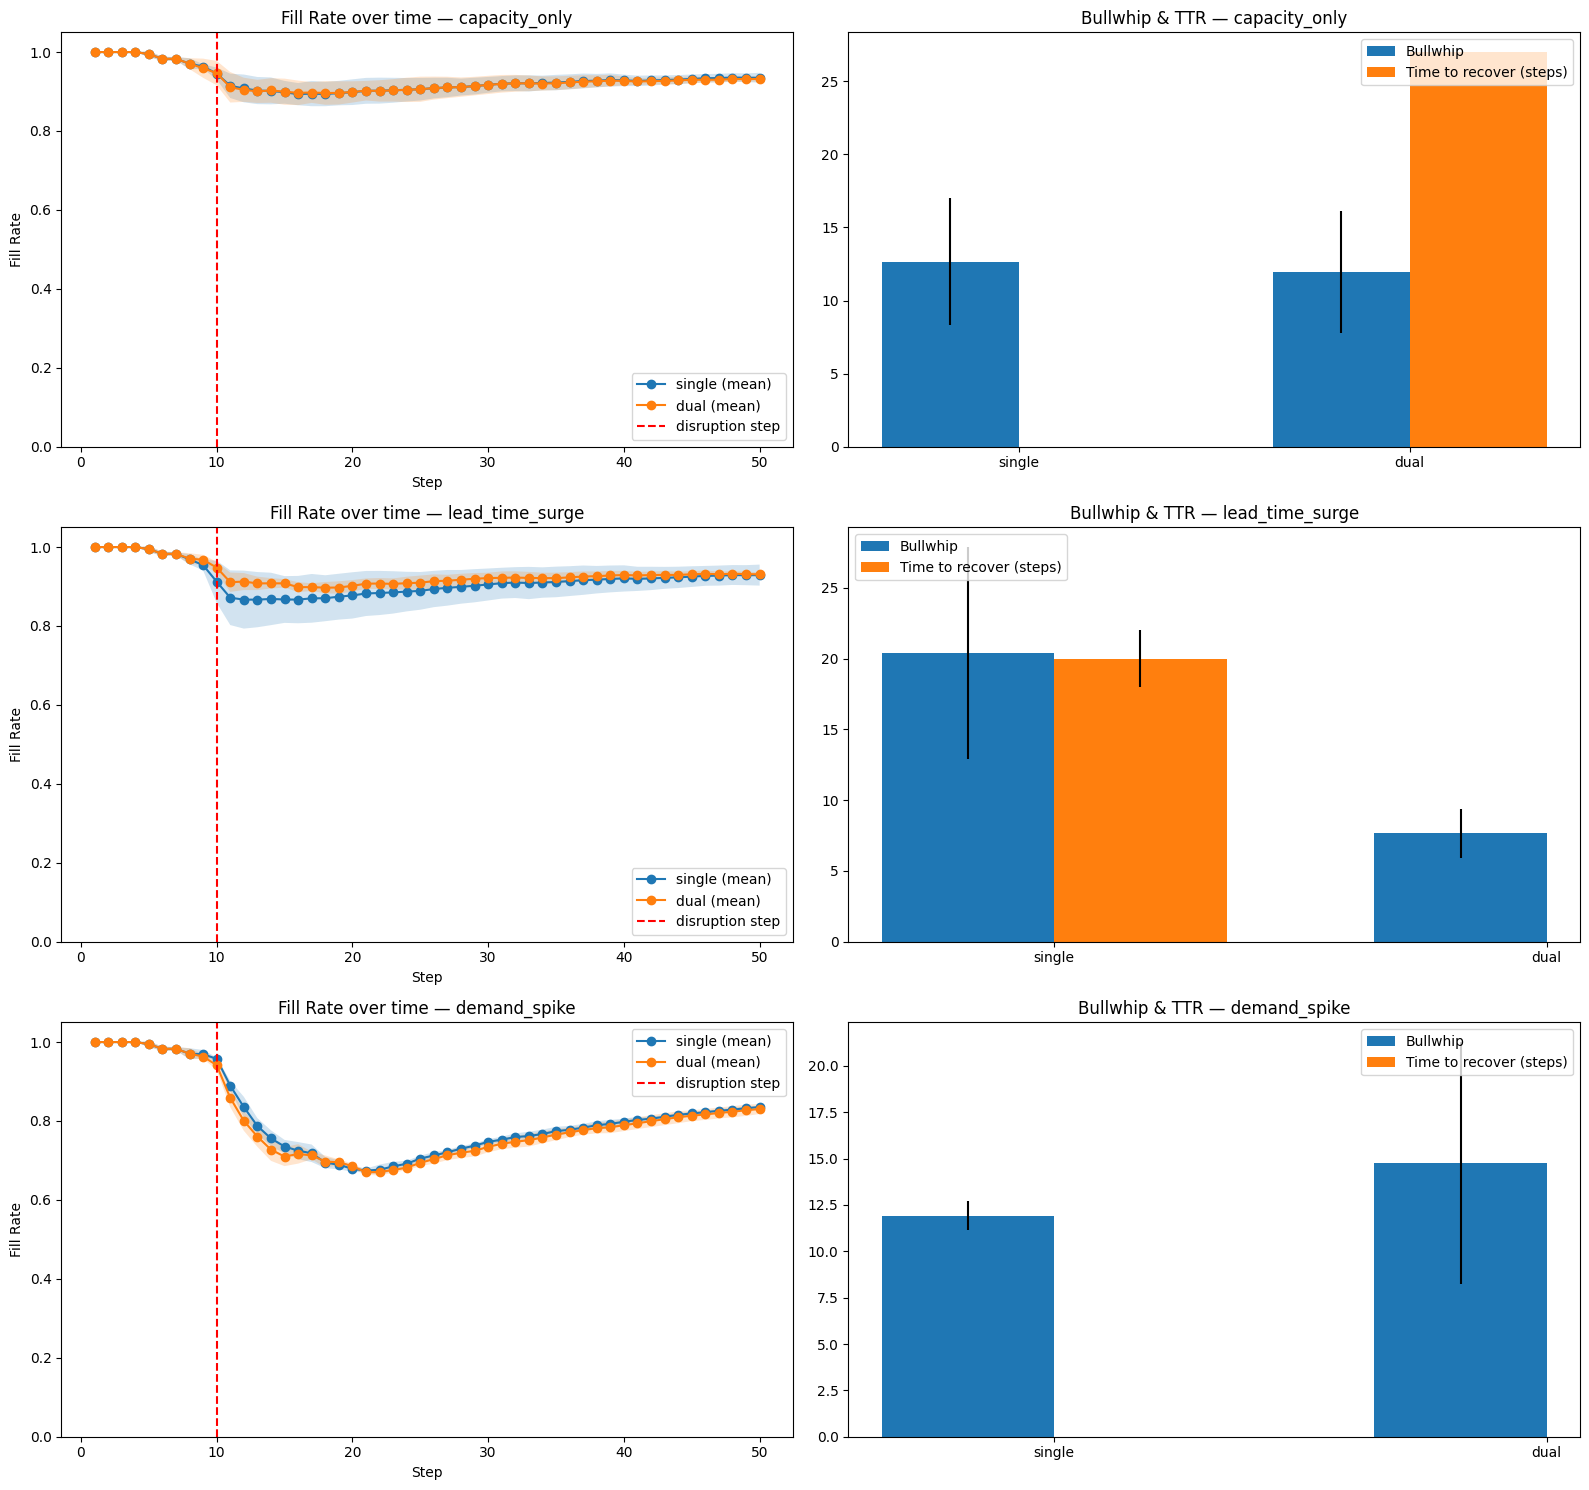

/tmp/ipykernel_32111/987351489.py:150: RuntimeWarning: Mean of empty slice
  "ttr_mean": np.nanmean(ttrs),
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,scenario,sourcing,fill_mean,fill_std,cost_mean,cost_std,bull_mean,bull_std,ttr_mean,ttr_std
0,capacity_only,single,0.934937,0.012495,58324.666667,6943.266538,12.654975,4.359433,NaN,NaN
1,capacity_only,dual,0.931835,0.006452,58497.333333,5062.079568,11.956964,4.195716,27.0,0.0
2,lead_time_surge,single,0.928945,0.026640,63497.666667,14243.392979,20.374279,7.501262,20.0,2.0
3,lead_time_surge,dual,0.930947,0.005031,56209.666667,4122.856318,7.654859,1.725835,NaN,NaN
4,demand_spike,single,0.835333,0.003244,123337.000000,2896.859449,11.920171,0.795674,NaN,NaN
5,demand_spike,dual,0.830301,0.012618,131395.000000,9910.110527,14.770386,6.514853,NaN,NaN


capacity_only | single: Fill 0.935±0.012, Cost 58325±6943, Bull 12.65±4.36, TTR nan±nan
capacity_only | dual: Fill 0.932±0.006, Cost 58497±5062, Bull 11.96±4.20, TTR 27.0±0.0
lead_time_surge | single: Fill 0.929±0.027, Cost 63498±14243, Bull 20.37±7.50, TTR 20.0±2.0
lead_time_surge | dual: Fill 0.931±0.005, Cost 56210±4123, Bull 7.65±1.73, TTR nan±nan
demand_spike | single: Fill 0.835±0.003, Cost 123337±2897, Bull 11.92±0.80, TTR nan±nan
demand_spike | dual: Fill 0.830±0.013, Cost 131395±9910, Bull 14.77±6.51, TTR nan±nan


In [1]:
from model import MultiTierModel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------
# Config
# ---------------------------
assumptions = {
    "n_suppliers": 3,
    "n_plants": 3,
    "n_dcs": 2,
    "n_retailers": 5,
    "base_stock": {"supplier": 100, "plant": 80, "dc": 60, "retailer": 30},
    "capacity": {"supplier": 20, "plant": 15, "dc": 10, "retailer": 0},
    "lead_time": {"supplier": 1, "plant": 5, "dc": 5, "retailer": 2},
    "capacity_loss_frac": 0.5,
    "recovery_duration": 5,
    "holding_cost": 1,
    "backlog_cost": 5,
    "retailer_demand_mean": 5
}

n_steps = 50
scenarios = ["capacity_only", "lead_time_surge", "demand_spike"]
sourcing_options = {"single": False, "dual": True}
seeds = [42, 7, 99]   # small repeats — tăng nếu có thời gian

# Data structure to collect results
results = {}  # results[scenario][sourcing] = list of runs (each run: dict with df, bullwhip, ttr)
for scenario in scenarios:
    results[scenario] = {}
    for sname, dual_flag in sourcing_options.items():
        results[scenario][sname] = []

# ---------------------------
# Run experiments
# ---------------------------
for scenario in scenarios:
    print(f"\n=== Scenario: {scenario} ===")
    for sname, dual_flag in sourcing_options.items():
        print(f"  Sourcing: {sname}")
        for seed in seeds:
            model = MultiTierModel(
                assumptions=assumptions,
                seed=seed,
                dual_sourcing=dual_flag,
                disruption_at_step=10,
                scenario=scenario  # scenario handled inside model
            )
            fill_rates = []
            total_costs = []
            for step in range(n_steps):
                model.step()
                fill_rates.append(model.compute_fill_rate())
                total_costs.append(model.compute_total_cost())

            df = pd.DataFrame({
                "step": range(1, n_steps + 1),
                "fill_rate": fill_rates,
                "total_cost": total_costs
            })

            bullwhip = model.compute_bullwhip()
            ttr = model.compute_time_to_recover()

            results[scenario][sname].append({
                "df": df,
                "bullwhip": bullwhip,
                "time_to_recover": ttr
            })

# ---------------------------
# Aggregate and plot
# ---------------------------
def aggregate_time_series(runs, key="fill_rate"):
    """Return (mean_series, std_series) of length n_steps"""
    arr = np.array([r["df"][key].values for r in runs])  # shape (n_runs, n_steps)
    mean = np.nanmean(arr, axis=0)
    std = np.nanstd(arr, axis=0)
    return mean, std

plt.figure(figsize=(16, 5 * len(scenarios)))

for i, scenario in enumerate(scenarios, 1):
    plt.subplot(len(scenarios), 2, 2*i - 1)
    for sname in sourcing_options.keys():
        runs = results[scenario][sname]
        mean, std = aggregate_time_series(runs, "fill_rate")
        steps = range(1, len(mean)+1)
        plt.plot(steps, mean, marker='o', label=f"{sname} (mean)")
        plt.fill_between(steps, mean - std, mean + std, alpha=0.2)
    plt.axvline(10, linestyle='--', color='red', label='disruption step')
    plt.title(f"Fill Rate over time — {scenario}")
    plt.xlabel("Step")
    plt.ylabel("Fill Rate")
    plt.ylim(0, 1.05)
    plt.legend()

    # Right column: bar chart for bullwhip & time_to_recover aggregated means
    plt.subplot(len(scenarios), 2, 2*i)
    bull_means = []
    bull_stds = []
    ttr_means = []
    ttr_stds = []
    labels = []
    for sname in sourcing_options.keys():
        runs = results[scenario][sname]
        bull = np.array([r["bullwhip"] if not np.isnan(r["bullwhip"]) else np.nan for r in runs], dtype=float)
        ttrs = np.array([r["time_to_recover"] if not np.isnan(r["time_to_recover"]) else np.nan for r in runs], dtype=float)
        bull_means.append(np.nanmean(bull))
        bull_stds.append(np.nanstd(bull))
        ttr_means.append(np.nanmean(ttrs))
        ttr_stds.append(np.nanstd(ttrs))
        labels.append(sname)

    x = np.arange(len(labels))
    width = 0.35
    plt.bar(x - width/2, bull_means, width, yerr=bull_stds, label="Bullwhip")
    plt.bar(x + width/2, ttr_means, width, yerr=ttr_stds, label="Time to recover (steps)")
    plt.xticks(x, labels)
    plt.title(f"Bullwhip & TTR — {scenario}")
    plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------
# Print summary table (mean ± std)
# ---------------------------
summary_rows = []
for scenario in scenarios:
    for sname in sourcing_options.keys():
        runs = results[scenario][sname]
        # final fill rate at last step
        finals = np.array([r["df"]["fill_rate"].iloc[-1] for r in runs], dtype=float)
        costs = np.array([r["df"]["total_cost"].iloc[-1] for r in runs], dtype=float)
        bulls = np.array([r["bullwhip"] for r in runs], dtype=float)
        ttrs = np.array([r["time_to_recover"] for r in runs], dtype=float)

        summary_rows.append({
            "scenario": scenario,
            "sourcing": sname,
            "fill_mean": np.nanmean(finals),
            "fill_std": np.nanstd(finals),
            "cost_mean": np.nanmean(costs),
            "cost_std": np.nanstd(costs),
            "bull_mean": np.nanmean(bulls),
            "bull_std": np.nanstd(bulls),
            "ttr_mean": np.nanmean(ttrs),
            "ttr_std": np.nanstd(ttrs),
        })

summary_df = pd.DataFrame(summary_rows)
display(summary_df)

# Print concise text summary
for _, row in summary_df.iterrows():
    print(f"{row['scenario']} | {row['sourcing']}: Fill {row['fill_mean']:.3f}±{row['fill_std']:.3f}, "
          f"Cost {row['cost_mean']:.0f}±{row['cost_std']:.0f}, Bull {row['bull_mean']:.2f}±{row['bull_std']:.2f}, "
          f"TTR {row['ttr_mean']:.1f}±{row['ttr_std']:.1f}")
